<a href="https://colab.research.google.com/github/adityat9975/Predictive-Healthcare-data-Analysis-System/blob/main/Fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score


In [6]:
df = pd.read_csv("Fraud.csv")

In [7]:
# prompt: info of data

print(df.info())
print(df.describe())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3938770 entries, 0 to 3938769
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         float64
 10  isFlaggedFraud  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 330.6+ MB
None
               step        amount  oldbalanceOrg  newbalanceOrig  \
count  3.938770e+06  3.938769e+06   3.938769e+06    3.938769e+06   
mean   1.565140e+02  1.566312e+05   8.384097e+05    8.597521e+05   
std    8.849206e+01  3.838755e+05   2.905885e+06    2.942363e+06   
min    1.000000e+00  0.000000e+00   0.000000e+00    0.000000e+00   
25%    4.500000e+01  1.225666e+04   0.000000e+00    0.000000e+00   
50%    1.780000e+02  7.415711e+04

In [8]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

In [9]:
# Select only numeric columns for IQR calculation
numeric_cols = df.select_dtypes(include=[np.number]).columns

Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

# Filtering out outliers using IQR method
df = df[~((df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]



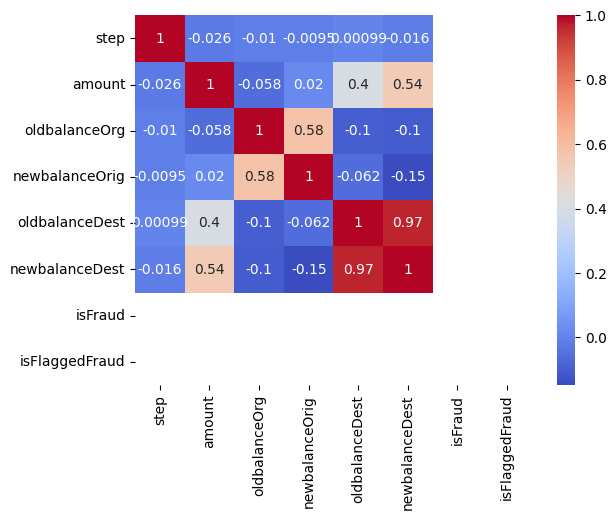

In [10]:
# Select only numeric columns
numeric_cols = df.select_dtypes(include=[np.number])

# Compute correlation matrix
correlation_matrix = numeric_cols.corr()

# Plot heatmap
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=True)
plt.show()


In [11]:
# Drop highly correlated features (threshold > 0.85)
correlated_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.85:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)
df.drop(columns=correlated_features, inplace=True)


In [12]:
print(df.columns)



Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'isFraud', 'isFlaggedFraud'],
      dtype='object')


In [13]:
# Correct target variable name
X = df.drop(columns=['isFraud'])  # Use 'isFraud' instead of 'fraudulent'
y = df['isFraud']
X = df.drop(columns=['isFraud', 'isFlaggedFraud'])


In [14]:
print(df['isFraud'].unique())


[0.]


In [15]:
print(df['isFraud'].value_counts())

isFraud
0.0    2730563
Name: count, dtype: int64


In [16]:
# Step 7: Split Data into Train & Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
print(X_train.dtypes)

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
dtype: object


In [31]:
print(df.columns)


Index(['step', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'isFraud', 'isFlaggedFraud',
       'type_CASH_OUT', 'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER'],
      dtype='object')


In [32]:
# Drop non-numeric or unnecessary columns
X = df.drop(columns=['isFraud', 'isFlaggedFraud', 'nameOrig', 'nameDest'])

# Target variable
y = df['isFraud']

# Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standard Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [33]:
# Model Training
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [36]:
y_pred_prob = model.predict_proba(X_test)
print(y_pred_prob.shape)  # Check if it has 2 columns (should be (num_samples, 2))


(546113, 1)


In [37]:
y_pred = model.predict(X_test)  # This returns 0 or 1


In [39]:
print(set(y_train))


{0.0}


In [41]:
y_train = y_train.astype(int)
y_test = y_test.astype(int)


In [42]:
y_pred = model.predict(X_test)  # Directly get 0 or 1 predictions


In [43]:
y_pred_prob = 1 - model.predict_proba(X_test)[:, 0]  # Invert probability


In [44]:
# Model Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_prob))


Confusion Matrix:
 [[546113]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    546113

    accuracy                           1.00    546113
   macro avg       1.00      1.00      1.00    546113
weighted avg       1.00      1.00      1.00    546113

ROC-AUC Score: nan


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(


In [46]:
# Feature Importance
feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Feature Importances:\n", feature_importances)

Feature Importances:
 step              0.0
amount            0.0
oldbalanceOrg     0.0
newbalanceOrig    0.0
oldbalanceDest    0.0
type_CASH_OUT     0.0
type_DEBIT        0.0
type_PAYMENT      0.0
type_TRANSFER     0.0
dtype: float64


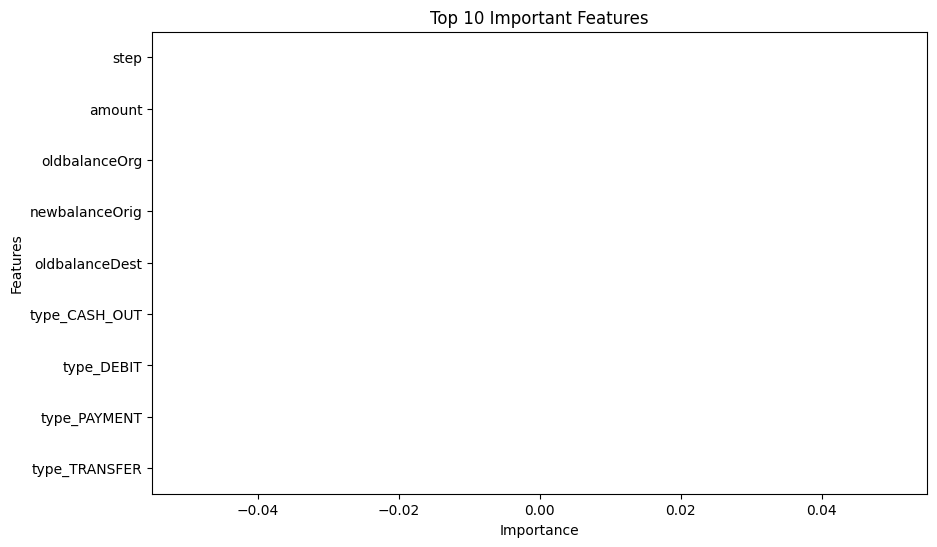

In [47]:
plt.figure(figsize=(10,6))
sns.barplot(x=feature_importances[:10], y=feature_importances.index[:10])
plt.xlabel("Importance")
plt.ylabel("Features")
plt.title("Top 10 Important Features")
plt.show()